# Get Immutable Reference Benchmarks

In [20]:
# select measurement file
file_name = "data/2025-03-19 00-00-16 kvs.json"

# plot settings
show_error_bar = False

In [21]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [22]:
from util.convert import convert_datasets
import pandas as pd

heap = convert_datasets(
    raw_data,
    "vNV-Heap",
    [("kvs", "vNV-Heap")],
    ["mean", "min", "max", "options.inner.iterations", "options.inner.object_count", "options.inner.access_type", "options.object_size", "options.inner.kvs_options.page_size", "machine_name", "cold_start", "repetitions"],
    unwrapped=show_error_bar
)

baseline = convert_datasets(
    raw_data,
    "Paged",
    [("kvs_paged", "Paged")],
    ["mean", "min", "max", "options.inner.iterations", "options.inner.object_count", "options.inner.access_type", "options.object_size", "options.inner.kvs_options.page_size", "machine_name", "cold_start", "repetitions"],
    unwrapped=show_error_bar
)

baseline = baseline[baseline["options.inner.kvs_options.page_size"].isin([32, 64, 128, 256, 512])]

dataset = pd.concat([heap, baseline])
dataset.rename({"options.inner.iterations": "options.iterations"}, axis=1, inplace=True)
dataset.rename({"options.inner.object_count": "options.object_count"}, axis=1, inplace=True)
dataset.rename({"options.inner.access_type": "options.access_type"}, axis=1, inplace=True)
dataset.rename({"options.inner.kvs_options.page_size": "options.page_size"}, axis=1, inplace=True)

dataset["options.access_type"] = dataset["options.access_type"].astype(str)
dataset

[{'mean': 658938152.0, 'min': 658938152, 'max': 658938152, 'options.inner': {'iterations': 10000, 'object_count': 256, 'access_type': 'Random', 'kvs_options': {'max_dirty': 11706}}, 'options.inner.iterations': 10000, 'options.inner.object_count': 256, 'options.inner.access_type': 'Random', 'options.inner.kvs_options': {'max_dirty': 11706}, 'options.inner.kvs_options.max_dirty': 11706, 'options.object_sizes': [32, 128, 256, 1024], 'options.object_count_distribution': [64, 128, 32, 32], 'bench_name': 'kvs', 'machine_name': 'esp32c3', 'cold_start': 0, 'repetitions': 5, 'ticks_per_ms': 16000}, {'mean': 657573463.2, 'min': 657573463, 'max': 657573464, 'options.inner': {'iterations': 10000, 'object_count': 256, 'access_type': 'Sequential', 'kvs_options': {'max_dirty': 11706}}, 'options.inner.iterations': 10000, 'options.inner.object_count': 256, 'options.inner.access_type': 'Sequential', 'options.inner.kvs_options': {'max_dirty': 11706}, 'options.inner.kvs_options.max_dirty': 11706, 'options

,mean,min,max,options.iterations,options.object_count,options.access_type,options.object_size,options.page_size,machine_name,cold_start,repetitions,ticks_per_ms,dataset_type,benchmark_title,benchmark_id
0,6.589382e+08,658938152,658938152,10000,256,Random,NaN,NaN,esp32c3,0,5,16000,vNV-Heap,vNV-Heap,kvs
1,6.575735e+08,657573463,657573464,10000,256,Sequential,NaN,NaN,esp32c3,0,5,16000,vNV-Heap,vNV-Heap,kvs
2,5.843734e+08,584373409,584373409,10000,256,"{'Partitioned': {'partition_size': 16, 'access...",NaN,NaN,esp32c3,0,5,16000,vNV-Heap,vNV-Heap,kvs
3,6.831892e+08,683189229,683189230,10000,256,"{'Distributed': {'key_distribution': [3489982,...",NaN,NaN,esp32c3,0,5,16000,vNV-Heap,vNV-Heap,kvs
0,6.124254e+08,612425419,612425419,10000,256,Random,NaN,32.0,esp32c3,0,5,16000,Paged,Paged,kvs_paged
1,7.227333e+08,722733254,722733254,10000,256,Sequential,NaN,32.0,esp32c3,0,5,16000,Paged,Paged,kvs_paged
2,1.080348e+08,108034849,108034850,10000,256,"{'Partitioned': {'partition_size': 16, 'access...",NaN,32.0,esp32c3,0,5,16000,Paged,Paged,kvs_paged
3,5.795512e+08,579551232,579551232,10000,256,"{'Distributed': {'key_distribution': [3489982,...",NaN,32.0,esp32c3,0,5,16000,Paged,Paged,kvs_paged
4,6.380801e+08,638080091,638080091,10000,256,Random,NaN,64.0,esp32c3,0,5,16000,Paged,Paged,kvs_paged
5,7.206517e+08,720651663,720651664,10000,256,Sequential,NaN,64.0,esp32c3,0,5,16000,Paged,Paged,kvs_paged


## Compare the latencies

In [23]:
from util.convert import scale_data
from IPython.display import HTML, display
import numpy as np
from math import isnan

unit = "us"
scaled = scale_data(dataset, unit)
pages_sizes = list(filter(lambda x: not isnan(x), scaled["options.page_size"].unique()))

for access_type in scaled["options.access_type"].unique():
    filtered_access_type = scaled[scaled["options.access_type"] == access_type]

    display(HTML(f"<b>ACCESS TYPE: {access_type}</b>"))

    res = []
    
    for pages_size in pages_sizes:

        right = filtered_access_type[filtered_access_type["options.page_size"] == pages_size]
        left = filtered_access_type[filtered_access_type["options.page_size"].isna()]

        assert(len(left["benchmark_id"].unique()) == 1)
        assert(len(right["benchmark_id"].unique()) == 1)

        a = left["mean"].iloc[0]
        b = right["mean"].iloc[0]
        res.append((pages_size, a,b,(100 * a)/b - 100, (100 * b)/a - 100))

    d = pd.DataFrame(res, columns=["Page size", f"{left["benchmark_id"].iloc[0]} [{unit}]", f"{right["benchmark_id"].iloc[0]} [{unit}]", "% Worse", "% Better"])

    display(d)
    print("Stats:")
    display(d.describe())

,Page size,kvs [us],kvs_paged [us],% Worse,% Better
0,32.0,41183634.5,3.827659e+07,7.594840,-7.058740
1,64.0,41183634.5,3.988001e+07,3.268878,-3.165405
2,128.0,41183634.5,4.497127e+07,-8.422347,9.196946
3,256.0,41183634.5,6.201432e+07,-33.590124,50.580013
4,512.0,41183634.5,9.771844e+07,-57.854798,137.274936


Stats:


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
count,5.000000,5.0,5.000000e+00,5.000000,5.000000
mean,198.400000,41183634.5,5.657213e+07,-17.800710,37.365550
std,195.173769,0.0,2.485242e+07,27.524765,60.345368
min,32.000000,41183634.5,3.827659e+07,-57.854798,-7.058740
25%,64.000000,41183634.5,3.988001e+07,-33.590124,-3.165405
50%,128.000000,41183634.5,4.497127e+07,-8.422347,9.196946
75%,256.000000,41183634.5,6.201432e+07,3.268878,50.580013
max,512.000000,41183634.5,9.771844e+07,7.594840,137.274936


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
0,32.0,41098341.45,4.517083e+07,-9.015745,9.909127
1,64.0,41098341.45,4.504073e+07,-8.752939,9.592571
2,128.0,41098341.45,4.498196e+07,-8.633732,9.449583
3,256.0,41098341.45,4.494533e+07,-8.559255,9.360439
4,512.0,41098341.45,4.494384e+07,-8.556236,9.356828


Stats:


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
count,5.000000,5.00,5.000000e+00,5.000000,5.000000
mean,198.400000,41098341.45,4.501654e+07,-8.703581,9.533710
std,195.173769,0.00,9.479161e+04,0.191900,0.230646
min,32.000000,41098341.45,4.494384e+07,-9.015745,9.356828
25%,64.000000,41098341.45,4.494533e+07,-8.752939,9.360439
50%,128.000000,41098341.45,4.498196e+07,-8.633732,9.449583
75%,256.000000,41098341.45,4.504073e+07,-8.559255,9.592571
max,512.000000,41098341.45,4.517083e+07,-8.556236,9.909127


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
0,32.0,3.652334e+07,6.752178e+06,440.911947,-81.512703
1,64.0,3.652334e+07,6.581332e+06,454.953598,-81.980475
2,128.0,3.652334e+07,6.701003e+06,445.042834,-81.652818
3,256.0,3.652334e+07,6.658761e+06,448.500500,-81.768476
4,512.0,3.652334e+07,7.142642e+06,411.342122,-80.443622


Stats:


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
count,5.000000,5.000000e+00,5.000000e+00,5.000000,5.000000
mean,198.400000,3.652334e+07,6.767183e+06,440.150200,-81.471619
std,195.173769,0.000000e+00,2.190151e+05,16.906298,0.599658
min,32.000000,3.652334e+07,6.581332e+06,411.342122,-81.980475
25%,64.000000,3.652334e+07,6.658761e+06,440.911947,-81.768476
50%,128.000000,3.652334e+07,6.701003e+06,445.042834,-81.652818
75%,256.000000,3.652334e+07,6.752178e+06,448.500500,-81.512703
max,512.000000,3.652334e+07,7.142642e+06,454.953598,-80.443622


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
0,32.0,4.269933e+07,3.622195e+07,17.882457,-15.169735
1,64.0,4.269933e+07,3.743116e+07,14.074278,-12.337819
2,128.0,4.269933e+07,4.177273e+07,2.218181,-2.170045
3,256.0,4.269933e+07,5.659664e+07,-24.555009,32.546905
4,512.0,4.269933e+07,8.733702e+07,-51.109704,104.539569


Stats:


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
count,5.000000,5.000000e+00,5.000000e+00,5.000000,5.000000
mean,198.400000,4.269933e+07,5.187190e+07,-8.297960,21.481775
std,195.173769,0.000000e+00,2.142164e+07,29.127554,50.168569
min,32.000000,4.269933e+07,3.622195e+07,-51.109704,-15.169735
25%,64.000000,4.269933e+07,3.743116e+07,-24.555009,-12.337819
50%,128.000000,4.269933e+07,4.177273e+07,2.218181,-2.170045
75%,256.000000,4.269933e+07,5.659664e+07,14.074278,32.546905
max,512.000000,4.269933e+07,8.733702e+07,17.882457,104.539569


# Final Plots

/tmp/ipykernel_4091494/2150140955.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paged_data["cmp"] = 0
/tmp/ipykernel_4091494/2150140955.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.9294126  0.96834595 1.09196946 1.50580013 2.37274936]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  paged_data.loc[paged_data["options.access_type"] == access_type, "cmp"] = paged_data.loc[paged_data["options.access_type"] == access_type, "mean"] / vnv_heap_data.loc[paged_data["options.access_type"] == access_type, "mean"].iloc[0]
/tmp/ipykernel_4091494/2150140955.py:39: SettingWithCopyWarning: 
A value is trying to be set on 

[<matplotlib.lines.Line2D object at 0x7d6ed14a2870>, <matplotlib.patches.Rectangle object at 0x7d6ed1541a90>] ['vNV-Heap', 'ManagedState']


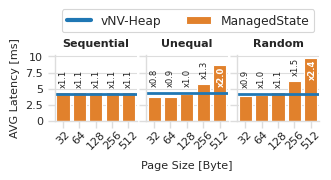

In [24]:
from util.plot import set_theme, save_plot
from util.convert import scale_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter 
from matplotlib.lines import Line2D
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerTuple
import math
import seaborn as sns

palette = set_theme(colors=2)
# palette = ["#25858e", "#51c56a"]
# palette = ["black", sns.color_palette("colorblind")[0]]
# palette = [sns.color_palette("tab10")[7], sns.color_palette("tab10")[0]]
palette = [sns.color_palette("tab10")[1], sns.color_palette("tab10")[0]]
# palette = ["black", sns.color_palette("tab10")[0]]
sns.set_palette(palette)

unit = "ms"
scaled_data = scale_data(dataset, unit)
scaled_data = scaled_data.copy()

# calculate average update latency
scaled_data["mean"] /= scaled_data["options.iterations"]

# change labels
scaled_data.loc[scaled_data["options.access_type"].str.contains("Partitioned"), "options.access_type"] = "Partitioned"
scaled_data.loc[scaled_data["options.access_type"].str.contains("Distributed"), "options.access_type"] = "Unequal"


vnv_heap_data = scaled_data[scaled_data["benchmark_id"] == "kvs"]
paged_data = scaled_data[scaled_data["benchmark_id"] == "kvs_paged"]
paged_data["cmp"] = 0
for access_type in paged_data["options.access_type"].unique():
    paged_data.loc[paged_data["options.access_type"] == access_type, "cmp"] = paged_data.loc[paged_data["options.access_type"] == access_type, "mean"] / vnv_heap_data.loc[paged_data["options.access_type"] == access_type, "mean"].iloc[0]

# make options.page_size int
paged_data["options.page_size"] = paged_data["options.page_size"].astype(int)

# change labels
paged_data["benchmark_title"] = "ManagedState"

# sort
access_types = ["Sequential", "Unequal", "Random"]
paged_data["options.access_type"] = pd.Categorical(paged_data["options.access_type"], access_types)
paged_data = paged_data.sort_values(by=["options.access_type"])


g = sns.catplot(
    data=paged_data,
    kind="bar",
    x="options.page_size", y="mean", hue="benchmark_title", col="options.access_type",
    col_wrap=4,
    errorbar="sd", alpha=1, aspect=(1/1.56)*(3.3/3) - (1/3) * 0.05, height=1.56, width=0.8,
    sharey=True,
)
g.set_titles("{col_name}")
g.set(xlabel=None, ylabel=f"AVG Latency [{unit}]")
g.tight_layout(pad=0)
g.legend.set_title("\nMeasurement")

def format_float(value, pos):
    if value == int(value) and not value == 1:
        return str(int(value))
    else:
        return str(value)

for (ax, access_type) in zip(g.axes, access_types):
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, y=0.05, ha="center")
    ax.set_title(ax.get_title(), rotation = 0, fontweight="bold")
    ax.yaxis.set_major_formatter(FuncFormatter(format_float))
    
    height = vnv_heap_data[vnv_heap_data["options.access_type"] == access_type]["mean"].iloc[0]
    
    # line = ax.axhline(y=height, color=sns.blend_palette(["white", palette[1]], n_colors=4)[1], linewidth=3)

    line = ax.axhline(y=height, color=palette[1], linewidth=2)
    # set bar colors depending on height
    # for bar in ax.patches:
        # if bar.get_height() < height:
            # bar.set_color("black")
        # else:
            # bar.set_color(sns.blend_palette(["black", palette[0]], as_cmap=True)(math.sqrt(float(bar.get_height() - height)/float(paged_data["mean"].max() - height))))
            # bar.set_color(sns.blend_palette(["black", palette[0]], as_cmap=True)(math.sqrt(float(bar.get_height() - height)/float(paged_data["mean"].max() - height))))
    
    barlabels = ax.bar_label(ax.containers[0], labels=paged_data.loc[paged_data["options.access_type"] == access_type, "cmp"].map('x{:,.1f}'.format), rotation=90, padding=4, color="#222222", fontsize=6)
    
    for (label, path, cmp) in zip(barlabels, ax.containers[0].patches, list(paged_data.loc[paged_data["options.access_type"] == access_type, "cmp"])):
        label.set_x(1)
        if cmp > 1.8:
            label.set_verticalalignment("top")
            label.set_y(-1)
            label.set_fontweight("bold")
            label.set_color("white")
        if cmp < 1.2:
            label.set_visible(False)
            ax.annotate(label.get_text(), (path.get_x() + path.get_width() / 2, line.get_ydata()[0] + 1), ha="center", va="bottom", rotation=90, fontsize=6, color="#222222")

#axins = zoomed_inset_axes(g.axes[1], 2, loc=1) # zoom = 6
g.figure.supxlabel("Page Size [Byte]", x=0.335, y=0.08, fontsize=8)
g.tight_layout(w_pad=0, h_pad=0)
g.legend.set(visible=False)

g.axes[0].set_yticks([0, 2.5, 5, 7.5, 10])

(legend_handles, legend_labels) = g.axes[-1].get_legend_handles_labels()
# cmap_gradient = sns.blend_palette(["black", palette[0]], as_cmap=True)(np.linspace(0, 1, 100))

# legend_handles.append([patches.Patch(facecolor=c, edgecolor=c, label=legend_labels[0]) for c in cmap_gradient])

legend_handles.insert(0, Line2D([0], [0], color=palette[1], lw=3))
legend_labels.insert(0, "vNV-Heap")
print(legend_handles, legend_labels)
plt.legend(
    handles = legend_handles,
    labels = legend_labels,
    loc = "lower center",
    bbox_to_anchor=(-0.6, 1.25),
    ncol=2,
    title=None,
    frameon=True,
    handler_map={list: HandlerTuple(ndivide=None, pad=0)}
)

save_plot(f"kvs", False)

# Compare Metadata Usage

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from util.plot import set_theme
import math

def plot_chunks(ax: plt.Axes, objs: list, unused_ram: int = 0):
    obj_cnt = sum(map(lambda x: x[0], objs))
    raw_obj_size = sum(map(lambda x: x[0]*x[1], objs))

    print("-- plotting chunks")
    print("obj cnt is:", obj_cnt)
    print("raw obj size is:", raw_obj_size)
    print("unused ram is:", unused_ram)

    # set_theme()
    # palette = ["#85D54AFF", "#2D808EFF"]
    # sns.set_palette(palette)

    page_sizes = list(map(int, filter(lambda x: not math.isnan(x), dataset["options.page_size"].unique())))
    page_counts = list(map(lambda size: int(math.ceil(float(raw_obj_size + unused_ram) / float(size))), page_sizes))

    
    labels = list(map(lambda _: "ManagedState", page_sizes))

    vnv_heap_line = obj_cnt / 1000
    data = pd.DataFrame({ "page_sizes": page_sizes, "page_counts": page_counts, "labels": labels, "cmp": list(map(lambda x: (x/1000) / vnv_heap_line, page_counts)) })

    # scale: 1k
    data["page_counts"] /= 1000

    sns.barplot(
        data=data,
        ax=ax,
        x="page_sizes", y="page_counts",
        errorbar="sd", alpha=1,
        width=0.7
    )

    ax.set_xlabel("Page Size [Byte]")
    ax.set_ylabel("# Managed Chunks [k]")

    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, y=0.05, ha="center")
    ax.set_yticks(list(map(lambda x: x * 0.5, range(5))))
    ax.set_title(ax.get_title(), rotation = 0, fontweight="bold")

    # ax.axhline(y=vnv_heap_line, color=sns.blend_palette(["white", palette[1]], n_colors=4)[1], linewidth=2)
    ax.axhline(y=vnv_heap_line, color=palette[1], linewidth=2)

    # for bar in ax.patches:
    #     if bar.get_height() < vnv_heap_line:
    #         bar.set_color("black")
    #     else:
    #         bar.set_color(sns.blend_palette(["black", palette[0]], as_cmap=True)(math.sqrt(float(bar.get_height() - vnv_heap_line)/(data["page_counts"].max() - vnv_heap_line))))

  
    # barlabels = ax.bar_label(ax.containers[0], labels=data["cmp"].map('x{:,.1f}'.format), rotation=90, padding=4, color="black", fontsize=6)
    # for (label, cmp) in zip(barlabels, list(data["cmp"])):
    #     label.set_x(1.5)
    #     if cmp > 5:
    #         label.set_y(-19)
    #         label.set_fontweight("bold")
    #         label.set_color("white")
    #     elif cmp < 0.5:
    #         label.set_y(6)
            


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from util.plot import set_theme
import math

metadata_paged_per_page = 1
metadata_heap_per_object = 3


def plot_metadata_usage(ax: plt.Axes, objs: list, unused_ram: int = 0):
    obj_cnt = sum(map(lambda x: x[0], objs))
    raw_obj_size = sum(map(lambda x: x[0]*x[1], objs))

    print("-- plotting metadata usage")
    print("obj cnt is:", obj_cnt)
    print("raw obj size is:", raw_obj_size)
    print("unused ram is:", unused_ram)

    # palette = set_theme()
    # # palette = ["#85D54AFF", "#2D808EFF"]
    # palette = ["#25858e", "#51c56a"]
    # sns.set_palette(palette)

    page_sizes = list(map(int, filter(lambda x: not math.isnan(x), dataset["options.page_size"].unique())))
    page_counts = list(map(lambda size: int(math.ceil(float(raw_obj_size + unused_ram) / float(size))), page_sizes))
    metadata_sizes = list(map(lambda cnt: cnt * metadata_paged_per_page, page_counts))
    labels = list(map(lambda _: "ManagedState", page_sizes))

    vnv_heap_line = (obj_cnt * metadata_heap_per_object) / 1000
    data = pd.DataFrame({ "page_sizes": page_sizes, "page_counts": page_counts, "metadata_sizes": metadata_sizes, "labels": labels, "cmp": list(map(lambda x: (x/1000) / vnv_heap_line, metadata_sizes)) })

    # scale: k
    data["metadata_sizes"] /= 1000

    sns.barplot(
        data=data,
        ax=ax,
        x="page_sizes", y="metadata_sizes",
        errorbar="sd", alpha=1,
        width=0.7
    )

    ax.set_xlabel("Page Size [Bytes]")
    ax.set_ylabel("Metadata [kB]", y=0.45)
    # g.figure.supxlabel("Page Size [Byte]", x=0.335, y=0.08, fontsize=8)


    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, y=0.05, ha="center")
    ax.set_yticks(list(map(lambda x: x * 0.5, range(5))))
    # ax.set_yticks(list(range(3)))
    ax.set_title(ax.get_title(), rotation = 0, fontweight="bold")

    # ax.axhline(y=vnv_heap_line, color=sns.blend_palette(["white", palette[1]], n_colors=4)[1], linewidth=3)
    ax.axhline(y=vnv_heap_line, color=palette[1], linewidth=2)

    # for bar in ax.patches:
    #     if bar.get_height() < vnv_heap_line:
    #         bar.set_color("black")
    #     else:
    #         bar.set_color(sns.blend_palette(["black", palette[0]], as_cmap=True)(math.sqrt(float(bar.get_height() - vnv_heap_line)/(data["metadata_sizes"].max() - vnv_heap_line))))


    # barlabels = ax.bar_label(ax.containers[0], labels=data["cmp"].map('x{:,.1f}'.format), rotation=90, padding=4, color="black", fontsize=6)
    # for (label, cmp) in zip(barlabels, list(data["cmp"])):
    #     label.set_x(1.5)
    #     if cmp > 5:
    #         label.set_y(-19)
    #         label.set_fontweight("bold")
    #         label.set_color("white")
    #     elif cmp < 0.5:
    #         label.set_y(6)
            


-- plotting metadata usage
obj cnt is: 256
raw obj size is: 59392
unused ram is: 0


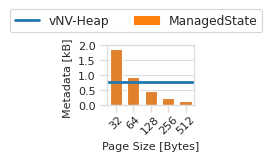

In [27]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

objs = [(64, 32), (128, 128), (32, 256), (32, 1024)]
unused_ram = 0

(fig, ax) = plt.subplots(1, 1, figsize=(1.56, 3.3*0.4))


# plot_chunks(axes[0], objs, unused_ram)
plot_metadata_usage(ax, objs, unused_ram)

# axes[0].set_title("(a) Total Chunks", fontweight="bold")
# ax.set_title("Total Metadata", fontweight="bold")

# cmap_gradient = sns.blend_palette(["black", palette[0]], as_cmap=True)(np.linspace(0, 1, 100))


legend_handles = []
legend_labels = []

legend_handles.append(Line2D([0], [0], color=palette[1], lw=2))
legend_labels.append("vNV-Heap")

legend_handles.append(plt.Rectangle((0,0),1,1, color=palette[0]))
legend_labels.append("ManagedState")


fig.legend(
    handles = legend_handles,
    labels = legend_labels,
    loc = "lower center",
    bbox_to_anchor=(0.55, 0.93),
    ncol=2,
    title=None,
    frameon=True,
    handler_map={list: HandlerTuple(ndivide=None, pad=0)}
)

fig.tight_layout()

save_plot(f"kvs_chunks", False)